In [1]:
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def generate_dataset():
  dataset = make_classification(n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30, 
                                scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1, 
                                class_sep=1, random_state=1)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['GRE_Score', 'Admission']
  return df

In [6]:
data = generate_dataset()
data.head()

,GRE_Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0


<Axes: xlabel='GRE_Score', ylabel='Admission'>

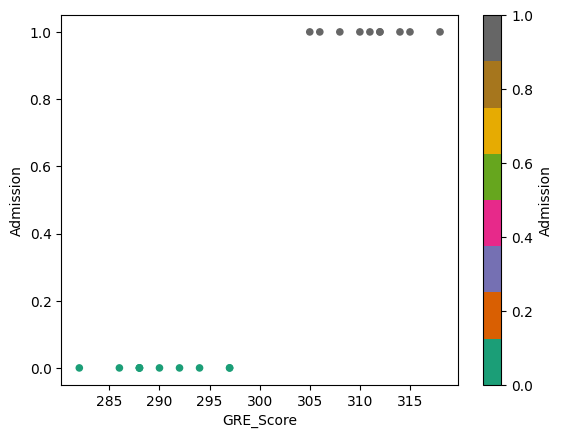

In [7]:
data.plot.scatter(x = "GRE_Score", y="Admission", c ="Admission", cmap = "Dark2")

## Logististic Regression

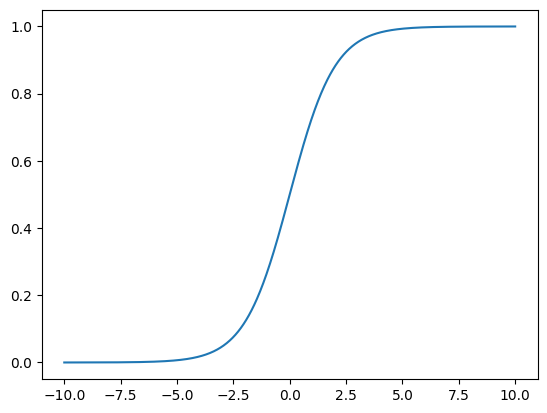

In [10]:
x = np.linspace(-10,10, 1000)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plt.plot(x, sigmoid(x))

In [16]:
from sklearn.linear_model import LinearRegression

X = data[["GRE_Score"]].to_numpy()
Y = data[["Admission"]].to_numpy()

lin_reg = LinearRegression()
lin_reg.fit(X, Y)   # <-- use fit() to train the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_hat =lin_reg.predict(X)

In [18]:
prob_y =sigmoid(y_hat)

In [19]:
result = prob_y > 0.6
result.astype(int).flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [20]:
Y.flatten()

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [21]:
from sklearn.metrics import  r2_score
r2_score(Y, y_hat)

0.8596760543976699